We  can convert a non-stationary dataset to stationary by one of the following methods:

1. Taking  difference. In this approach, from each value in the time series data we subtract the previous value. In python we can do this by using df.diff() method. In some dataset taking the difference once is enough  to make it stationary. But some in cases, we need to take difference more than once.
2. Taking the log of the time series, using np.log(df)
3. Taking the square root of the time series, np.sqrt(df)
4. Taking the proportional change, by using df.shift(1)/df

In [1]:
#loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

#reading the time series data
trainingdata = pd.read_csv('AirPassengers.csv')



In [2]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    

In [3]:
trainingdata.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

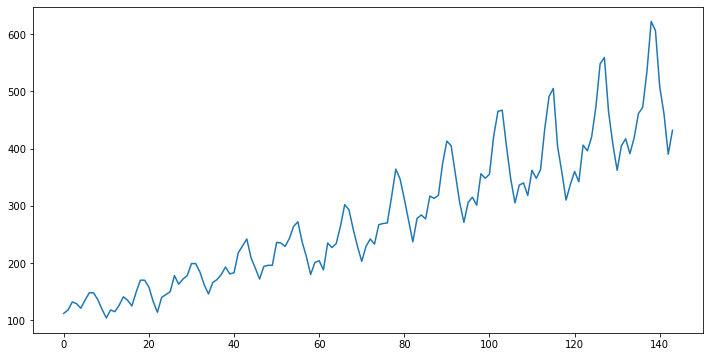

In [4]:
plt.rcParams.update({'figure.figsize': (12,6)})
trainingdata['#Passengers'].plot()

In [5]:
adf_test(trainingdata['#Passengers'])

ADF Statistic: 0.815369
p-value: 0.991880


### Differencing  y(t) = y(t)-y(t-1)

In [6]:
trainingdata['#Passengers_diff'] = trainingdata['#Passengers'] - trainingdata['#Passengers'].shift(1)

<AxesSubplot:>

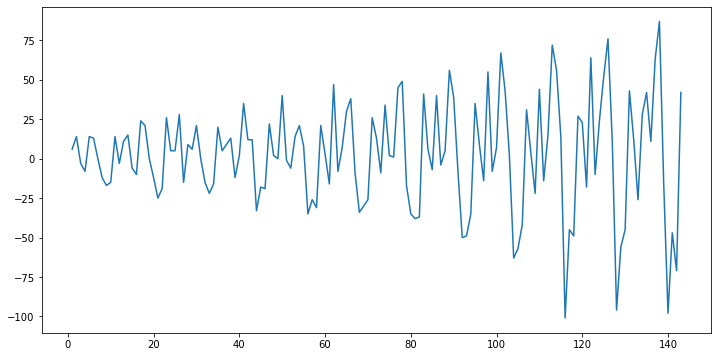

In [7]:
trainingdata.dropna(inplace=True)
trainingdata['#Passengers_diff'].plot()

In [8]:
adf_test(trainingdata['#Passengers_diff'])

ADF Statistic: -2.829267
p-value: 0.054213


### Seasonal differencing meaning - y(t) = y(t)-y(t-n)

<AxesSubplot:>

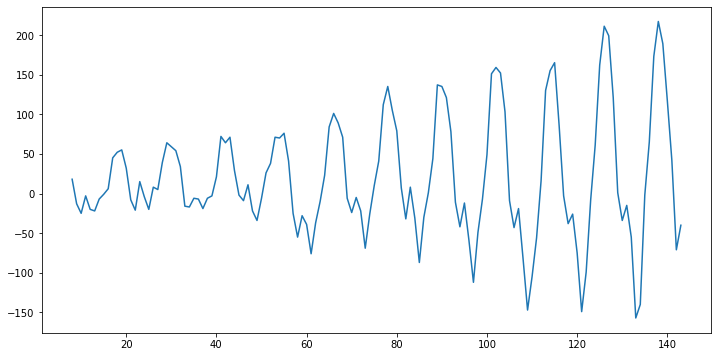

In [9]:

trainingdata['#Passengers_diff_7'] = trainingdata['#Passengers'] - trainingdata['#Passengers'].shift(7)
trainingdata.dropna(inplace=True)
trainingdata['#Passengers_diff_7'].plot()

In [10]:
adf_test(trainingdata['#Passengers_diff_7'])

ADF Statistic: -3.417952
p-value: 0.010362


### Transformation using differencing on log and square root values

In [11]:

import numpy as np

# Calculate the log 
trainingdata['log'] = np.log(trainingdata['#Passengers'])

# Calculate the square root 
trainingdata['sqrt'] = np.sqrt(trainingdata['#Passengers'])



<AxesSubplot:>

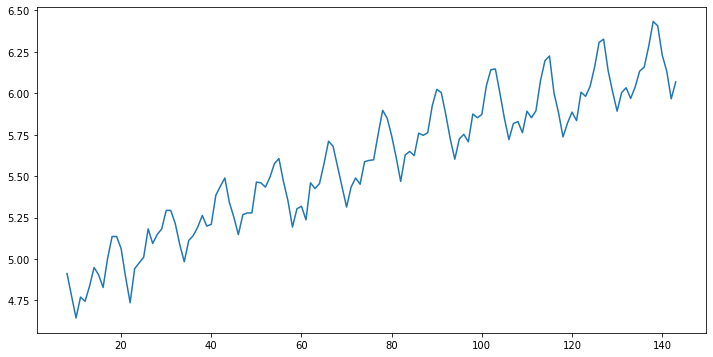

In [12]:
trainingdata.dropna(inplace= True)
trainingdata['log'].plot()

In [13]:
adf_test(trainingdata['log'])

ADF Statistic: -1.760207
p-value: 0.400389


<AxesSubplot:>

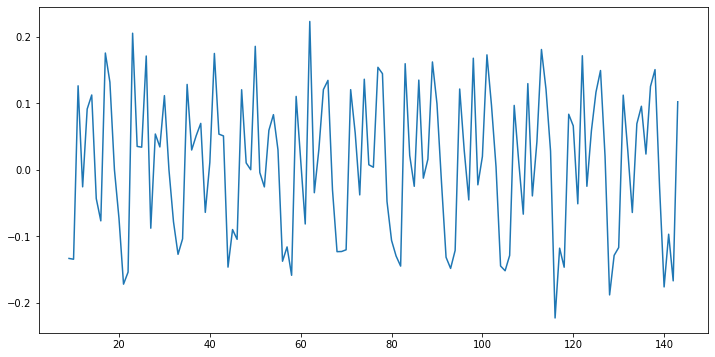

In [14]:
trainingdata['#Passengers_log_diff'] = trainingdata['log'] - trainingdata['log'].shift(1)
trainingdata.dropna(inplace=True)
trainingdata['#Passengers_log_diff'].plot()

In [15]:
adf_test(trainingdata['#Passengers_log_diff'])

ADF Statistic: -2.805223
p-value: 0.057532


<AxesSubplot:>

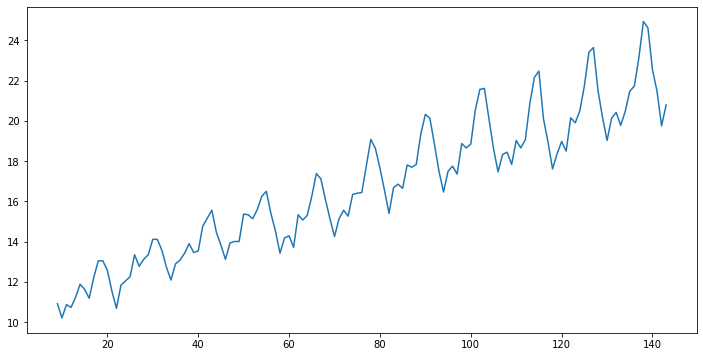

In [16]:
trainingdata['sqrt'].dropna().plot()

In [17]:
adf_test(trainingdata['sqrt'])

ADF Statistic: -0.704808
p-value: 0.845500


<AxesSubplot:>

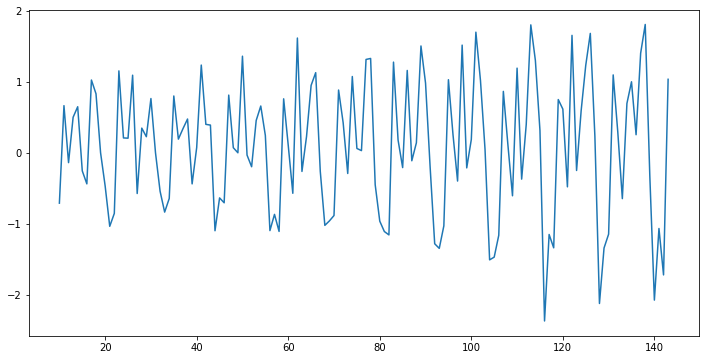

In [18]:
trainingdata['#Passengers_sqrt_diff'] = trainingdata['sqrt'] - trainingdata['sqrt'].shift(1)
trainingdata.dropna(inplace=True)
trainingdata['#Passengers_sqrt_diff'].plot()

In [19]:
adf_test(trainingdata['#Passengers_sqrt_diff'])

ADF Statistic: -3.230104
p-value: 0.018307


Thus by comparing `p value` before and  after applying differencing on log and square root values , we can see that non-stationary data has changed to stationary data